In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
my_numbers = np.array([
    [15,18,43,50,67],
    [5,23,39,55,71],
    [10,28,'Free',48,68],
    [14,27,32,49,63],
    [9,25,37,58,74]
])

my_numbers

array([['15', '18', '43', '50', '67'],
       ['5', '23', '39', '55', '71'],
       ['10', '28', 'Free', '48', '68'],
       ['14', '27', '32', '49', '63'],
       ['9', '25', '37', '58', '74']], dtype='<U21')

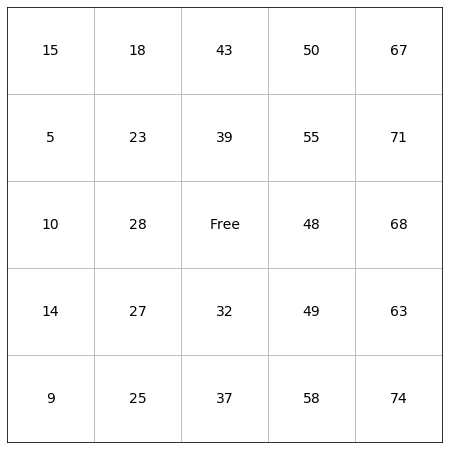

In [5]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_ylim([-4.5, 0.5])
ax.set_xlim([-0.5, 4.5])
ax.set_aspect('equal')

ax.set_xticks([0.5, 1.5, 2.5, 3.5])
ax.set_yticks([-3.5, -2.5, -1.5, -0.5])
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])


for axi in (ax.xaxis, ax.yaxis):
    for tic in axi.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        
        
ax.grid(True)

for row_index, row in enumerate(my_numbers):
    for column_index, cell in enumerate(row):
        ax.scatter(column_index, -row_index, alpha=0)
        ax.text(x = column_index, 
                y = -row_index, 
                s = cell,
                ha="center", 
                va="center", 
                fontsize=14)